# 신경망 학습

학습 : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 말한다.

손실 함수 : 신경망이 학습할 수 있도록 해주는 지표, 손실 함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표

In [1]:
# 회색 블록은 사람이 개입하지 않음을 뜻한다.
# 신경망의 경우, 입력부터 출력까지 사람의 개입없이, 이미지에 포함된 중요한 특징까지도 기계가 스스로 학습

![image](https://user-images.githubusercontent.com/81560908/234729675-1cce42e6-86f9-4f8b-8fcd-f7fe260518a3.png)

---

# 손실 함수(loss function)

- 모델마다 다르며 임의의 함수를 사용할 수도 있지만, 일반적으로 평균 제곱 오차(MSE)와 교차 엔트로피 오차(CEE)를 사용한다.

## 평균 제곱 오차(MSE)

k : 데이터의 차원 수   &nbsp;&nbsp;  y : 신경망의 출력(신경망이 추정한 값) &nbsp;&nbsp;t : 정답 레이블

![image](https://user-images.githubusercontent.com/81560908/234737696-589ead8e-d073-4798-a790-a5d2c21c5522.png)

In [2]:
# 함수로 구현
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
import numpy as np

# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# y : 소프트맥스 함수의 출력

# '2'일 확률이 가장 높다고 추정한 경우 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
# '7'일 확률이 가장 높다고 추정한 경우 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

손실 함수 쪽 출력이 작으면 정답 레이블과의 오차도 작다.

=> 평균 제곱 오차를 기준으로 첫 번째 추정 결과가 정답에 더 가까울 것으로 판단할 수 있다.

## 교차 엔트로피 오차(CEE)

log는 자연로그  &nbsp;&nbsp; y : 신경망의 출력 &nbsp;&nbsp; t : 정답 레이블

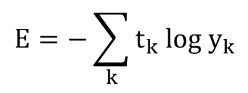

In [5]:
# 함수로 구현
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log (y+delta))

np.log( )함수에  0을 입력하면 &nbsp; -inf(마이너스 무한대)가 되어서 더 이상 계산을 진행할 수 없어서 아주 작은 값인 delta를 더했다.

In [6]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# '2'일 확률이 가장 높다고 추정한 경우 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [7]:
# '7'일 확률이 가장 높다고 추정한 경우 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

결과(오차 값)가 더 작은 첫 번째 추정이 정답일 가능성이 높다 

평균제곱 오차의 판단과 일치하다.

## 미니배치 학습

- 위에는 데이터 하나에 대한 손실 함수

- 훈련 데이터 모두에 대한 손실 함수의 합을 구하는 법

n : 데이터의 개수

![image](https://user-images.githubusercontent.com/81560908/234764022-25e9dcd8-9a21-48a3-93c1-faadf4979c88.png)

- 데이터가 많은 경우, &nbsp;시간이 많이 걸리기 때문에 데이터 일부를 추려 전체의 근사치로 이용할 수 있다. &nbsp;&nbsp;   =>  &nbsp;&nbsp;미니배치 학습

## 손실함수 설정하는 이유

신경망 학습에서 최적의 매개변수(가중치와 편향)을 탐색할 때 손실함수의 값을 가능한 작게 하는 매개변수 값을 찾는다. 

매개변수의 손실함수의 미분 => 가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실함수가 어떻게 변하는지 확인

미분 값 > 0  &nbsp; &nbsp; => &nbsp; 가중치 매개변수를 음의 방향으로 변화시켜서 손실함수의 값 줄임

미분 값 < 0 &nbsp; &nbsp;=> &nbsp;가중치 매개변수를 양의 방향으로 변화시켜서 손실힘수의 값 줄임

미분 값 =  0  &nbsp; &nbsp;=>&nbsp;  손실 함수의 값은 달라지지 않기 때문에 가중치 매개변수의 갱신을 멈춘다

<span style="color:red">0이 되지 않아야 신경망이 올바르게 학습 가능하다.</span>  &nbsp;&nbsp;=>&nbsp;&nbsp; 신경망 학습에서 중요한 성질

In [8]:
# 활성화 함수

![image](https://user-images.githubusercontent.com/81560908/234788209-25c6803c-6cfe-4b57-9ec8-b1a1cc2c5578.png)

- 계단 함수의 경우, 한순간만 변화를 일으켜 매개변수의 작은 변화가 주는 파장을 계단 함수가 말살해 손실 함수의 값에는 아무런 변화가 나타나지 않는다. 

- 시그모이드 함수의 경우, 미분값이 어느 장소라도 0이 되지 않는 덕분에 신경망이 올바르게 학습할 수 있다.

---

# 수치 미분

- 아주 작은 차분(h)으로 미분하는 것

In [9]:
# 오차를 줄이기 위해 (x+h)와 (x-h)일 때의 함수 f의 차분을 계산한다.  =>  중심 차분, 중앙 차분
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

### 편미분

- 변수가 여럿인 함수에 대한 미분

![image](https://user-images.githubusercontent.com/81560908/234908748-d6f6fafd-be4a-4eb3-8d1e-a2c7fb05de7b.png)

---

# 기울기

- 모든 변수의 편미분을 벡터로 정리한 것

In [10]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

![image](https://user-images.githubusercontent.com/81560908/234909332-7b7459f0-90b6-48d0-82f5-452776b5f657.png)

- 기울기가 가리키는 쪽은 각 장소에서 함수의 출력값을 가장 크게 줄이는 방향이다. 

## 경사법(경사 하강법)

- 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하는 것을 반복하여 함수의 값을 점차 줄이는 방법

- 기계학습을 최적화하는 데 흔히 쓰는 방법

- 기울기가 가리키는 곳에 정말 함수의 최적값이 있는지 보장할 수 없다. 

    ex) 극소값, 안장점

- 복잡하고 찌그러진 모양의 함수라면 평평한 곳으로 파고들면서 고원이라 하는 학습이 진행되지 않는 정체기에 빠질 수 있다.

### 수식

![image](https://user-images.githubusercontent.com/81560908/234913004-ee3e754d-250f-48a6-a677-7b03246282a7.png)

### 학습률(learning rate) 

η 기호(에타) : 학습률(learning rate) 

=>  한 번의 학습으로 매개변수 값을 얼마나 갱신하느냐를 정하는 것

- 너무 크거나 작으면 좋은 장소로 찾아갈 수 없다.

![image](https://user-images.githubusercontent.com/81560908/234914055-d487b1e1-e4ab-4014-beb6-4ce7bc7f6b0f.png)

In [11]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
            
        return x

![image](https://user-images.githubusercontent.com/81560908/234915526-8975883c-d0b6-4a13-b7a9-38e1f79f19da.png)

- 거의 (0, 0)에 가까워진다.

## 신경망에서의 기울기

- 가중치 매개변수에 대한 손실 함수의 기울기

W : 가중치  &nbsp;&nbsp; L : 손실 함수

![image](https://user-images.githubusercontent.com/81560908/234918701-b9900378-0144-4dea-9e55-a0b76a758d3d.png)

---

# 학습 알고리즘 구현하기

## 신경망 학습 절차

1단계 - 미니배치

- 훈련 데이터 중 일부를 무작위로 가져온다.

2단계 - 기울기 산출

- 미니매치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.

3단계 - 매개변수 갱신

- 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.

4단계 - 반복

- 1~3단계를 반복한다.

데이터를 미니배치로 무작위로 선정하기 때문에 **SGD(확률적 경사 하강법)** 이라고 부른다.

## 2층 신경망 클래스 구현하기

In [12]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

## 미니배치 학습 구현하기

In [13]:
import sys, os
sys.path.append(os.pardir)
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

![image](https://user-images.githubusercontent.com/81560908/235111114-a2327051-0a6a-4e24-b491-1614772e4887.png)

- 학습 횟수가 늘어가면서 손실 함수의 값이 줄어든다.  &nbsp;  &nbsp;  =>  &nbsp;  &nbsp;  최적 가중치 매개변수로 서서히 다가가고 있다.

## 시험 데이터로 평가하기

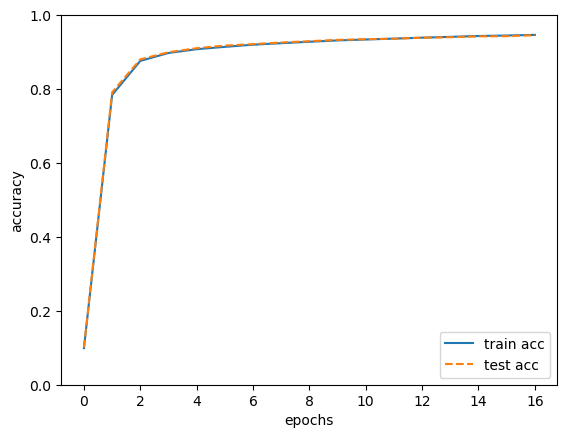

In [14]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

- 에폭(학습)이 진행될수록 훈련 데이터와 시험 데이터의 정확도가 좋아지고 있으며 두 정확도에 차이가 없다. 즉 오버피팅이 일어나지 않았다.